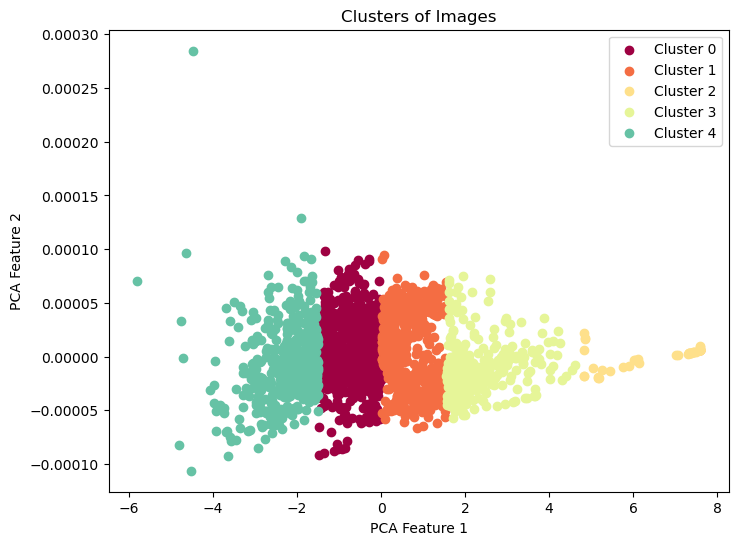

In [5]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import cv2
import os
from pytesseract import image_to_string
from PIL import Image
import matplotlib.pyplot as plt

Image.MAX_IMAGE_PIXELS = None  # set to a specific larger max image size

# Function to extract features from an image
def extract_features(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Edge density feature
    edges = cv2.Canny(gray, 100, 200)
    edge_density = np.sum(edges) / edges.size
    
    # Text density feature using OCR
    text = image_to_string(Image.open(image_path))
    text_density = len(text) / (gray.shape[0] * gray.shape[1])
    
    return [edge_density, text_density]


# Function to get image paths
import os
from glob import glob

# Function to get image paths from multiple directories
def get_image_paths(base_dirs):
    image_paths = []
    for base_dir in base_dirs:
        # Find all .jpg files in the directory and its subdirectories
        search_path = os.path.join(base_dir, '**/*.jpg')
        image_paths.extend(glob(search_path, recursive=True))
    return image_paths

# List of base directories to include
base_directories = [
    '/Users/jadeja19/Documents/Hiwi iktd/data set/allgemein1-5/01Schraubedrawcorrected',
    '/Users/jadeja19/Documents/Hiwi iktd/data set/allgemein1-5/01Schraubedrawuncorrected',
    '/Users/jadeja19/Documents/Hiwi iktd/data set/allgemein1-5/02corrected',
    '/Users/jadeja19/Documents/Hiwi iktd/data set/allgemein1-5/02uncorrected',
    '/Users/jadeja19/Documents/Hiwi iktd/data set/allgemein1-5/03corrected',
    '/Users/jadeja19/Documents/Hiwi iktd/data set/allgemein1-5/03uncorrected',
    '/Users/jadeja19/Documents/Hiwi iktd/data set/allgemein1-5/04corrected',
    '/Users/jadeja19/Documents/Hiwi iktd/data set/allgemein1-5/04uncorrected',
    '/Users/jadeja19/Documents/Hiwi iktd/data set/allgemein1-5/05corrected',
    '/Users/jadeja19/Documents/Hiwi iktd/data set/allgemein1-5/05uncorrected']
    # Add as many directories as you have


# Now call get_image_paths with your list of directories
image_paths = get_image_paths(base_directories)


# Extract features for all images
features = np.array([extract_features(path) for path in image_paths])

# Use KMeans to cluster the images into 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(features)

# Reduce dimensions for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features)

# Plot the reduced features in a scatter plot
plt.figure(figsize=(8, 6))
# Use a colormap instead of a fixed list for more flexibility
cmap = plt.cm.get_cmap('Spectral')
unique_labels = np.unique(kmeans.labels_)
for i, label in enumerate(unique_labels):
    cluster_points = reduced_features[kmeans.labels_ == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=cmap(i / len(unique_labels)), label=f'Cluster {label}')
plt.title('Clusters of Images')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')

# Create a legend without duplicate labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.show()